<h6>Trabalho Grupo14 -ciência de dados</h6>


<h6>sobre o conjunto de dados</h6>
Este conjunto de dados descreve os resultados das campanhas de marketing do banco em Portugal. As campanhas realizadas basearam-se maioritariamente em chamadas telefónicas diretas, oferecendo ao cliente bancário a realização de um depósito a prazo. Se depois de todos os esforços de marcação, o cliente concordou em colocar depósito - variável de destino marcada como 'sim', caso contrário, 'não'


De onde achar este base  <a href=" https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv?select=bank-additional-full.csv">kaggle.com</a>

<h6>Importar bibliotecas python necessárias</h6>

In [420]:
#bibliotecas python
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
pd.set_option('display.max_columns', None )
%matplotlib inline

In [421]:
#importa modelos 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [374]:
#dataset=pd.read_csv('bank-additional.csv',index_col=False, quotechar='"')

In [422]:
#carregar o conjunto de dados
bank_data= pd.read_csv("bank-additional.csv")

In [423]:
#verificamos quantidade de linhas e de colunas tem na base
bank_data.shape

(41188, 21)

In [424]:
#imprimir as 10 primeiras linhas da base
bank_data.head(10)

,"index,""age","job""""","marital""""","education""""","default""""","housing""""","loan""""","contact""""","month""""","day_of_week""""","duration""""","campaign""""","pdays""""","previous""""","poutcome""""","emp.var.rate""""","cons.price.idx""""","cons.conf.idx""""","euribor3m""""","nr.employed""""","y"""""""
0,"0,""56","housemaid""""","married""""","basic.4y""""","no""""","no""""","no""""","telephone""""","may""""","mon""""",261,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
1,"1,""57","services""""","married""""","high.school""""","unknown""""","no""""","no""""","telephone""""","may""""","mon""""",149,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
2,"2,""37","services""""","married""""","high.school""""","no""""","yes""""","no""""","telephone""""","may""""","mon""""",226,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
3,"3,""40","admin.""""","married""""","basic.6y""""","no""""","no""""","no""""","telephone""""","may""""","mon""""",151,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
4,"4,""56","services""""","married""""","high.school""""","no""""","no""""","yes""""","telephone""""","may""""","mon""""",307,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
5,"5,""45","services""""","married""""","basic.9y""""","unknown""""","no""""","no""""","telephone""""","may""""","mon""""",198,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
6,"6,""59","admin.""""","married""""","professional.course""""","no""""","no""""","no""""","telephone""""","may""""","mon""""",139,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
7,"7,""41","blue-collar""""","married""""","unknown""""","unknown""""","no""""","no""""","telephone""""","may""""","mon""""",217,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
8,"8,""24","technician""""","single""""","professional.course""""","no""""","yes""""","no""""","telephone""""","may""""","mon""""",380,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
9,"9,""25","services""""","single""""","high.school""""","no""""","yes""""","no""""","telephone""""","may""""","mon""""",50,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""


In [425]:
#Excluir dados nao relevante
bank_data.drop(['month""','day_of_week""'],axis=1,inplace=True)

<h6>Análise exploratória de dados</h6>

Nesta seção, vamos explorar nosso conjunto de dados para obter insights. A análise exploratória de dados é uma etapa importante em qualquer projeto de Data Analytics ou Data Science. É o processo de investigar o conjunto de dados para descobrir padrões e anomalias (outliers) e formar hipóteses com base em nossa compreensão do conjunto de dados.


<h6>Descrição do conjunto de dados e variáveis</h6>

In [ ]:
| col                  | desc                                                                    | type |
|----------------------|-------------------------------------------------------------------------|------|
| age                  | Idades dos clientes na base                                             | Int  |
| job                  | Tipo de trabalho dos clientes                                           | cat  |
| marital              | Estado civil dos clientes                                               | Cat  |
| education            | Histórico educacional                                                   | Cat  |
| default              | O cliente tem crédito inadimplente                                      | Cat  |
| housing              | O cliente tem crédito à habitação                                       | Cat  |
| personal_loan        | O cliente tem empréstimo pessoal                                        | Cat  |
| contact              | Tipo de comunicação                                                     | Cat  |
| duration             | Duração do último contato                                               | int  |
| campaign             | número de contatos realizados durante esta campanha e para este cliente | Int  |
| previous             | número de contatos realizados antes desta campanha e para este cliente  | Int  |
| poutcome             | resultado da campanha de marketing anterior                             | Cat  |
| employ_var_rate      | taxa de variação do emprego:                                            | Int  |
| consumer_price_index | índice de Preços ao Consumidor                                          | Int  |
| consumer_conf_index  | índice de confiança do consumidor                                       | Int  |
| euribor3_month       | taxa euribor 3 meses - indicador diário                                 | Int  |
| nr_employed          | número de funcionários - indicador trimestral                           | Int  |
| days of week         | Último contato dias da semana                                           | Cat  |
| month                | Último mês de contato                                                   | Cat  |
| term_deposit         | o cliente subscreveu um depósito a prazo? (binário: "sim", "não")       | Cat  |

In [379]:
#verificamos os tipos de variaveis
bank_data.dtypes

index,"age           object
job""                object
marital""            object
education""          object
default""            object
housing""            object
loan""               object
contact""            object
duration""            int64
campaign""            int64
pdays""               int64
previous""            int64
poutcome""           object
emp.var.rate""      float64
cons.price.idx""    float64
cons.conf.idx""     float64
euribor3m""         float64
nr.employed""       float64
y"""                 object
dtype: object

In [429]:
#renomeamos as colunas que possui aspas duplas.
bank_data.rename(columns={'job""':'job','education""':'education','default""':'default','housing""':\
                   'housing','loan""':'personal_loan','y"""':'term_deposit','cons.conf.idx""':\
                    'consumer_confidence','marital""':'marital','cons.conf.idx""':\
                    'consumer_confidence','cons.price.idx""':'consumer_price','index,"age':'age',\
                    'campaign""':'campaign','pdays""':'pdays','previous""':'previous',\
                    'poutcome""':'poutcome','contact""':'contact','duration""':\
                    'duration','emp.var.rate""':'employment_variation_rate','euribor3m""':\
                     'euribor3_month_rate','nr.employed""':'nr.employed'},inplace= True)

In [430]:
bank_data.head(5)

,age,job,marital,education,default,housing,personal_loan,contact,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price,consumer_confidence,euribor3_month_rate,nr.employed,term_deposit
0,"0,""56","housemaid""""","married""""","basic.4y""""","no""""","no""""","no""""","telephone""""",261,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
1,"1,""57","services""""","married""""","high.school""""","unknown""""","no""""","no""""","telephone""""",149,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
2,"2,""37","services""""","married""""","high.school""""","no""""","yes""""","no""""","telephone""""",226,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
3,"3,""40","admin.""""","married""""","basic.6y""""","no""""","no""""","no""""","telephone""""",151,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""
4,"4,""56","services""""","married""""","high.school""""","no""""","no""""","yes""""","telephone""""",307,1,999,0,"nonexistent""""",1.1,93.994,-36.4,4.857,5191.0,"no""""\r"""


In [427]:
#imprimir as colunas
for col in bank_data:
    print(col)

index,"age
job""
marital""
education""
default""
housing""
loan""
contact""
duration""
campaign""
pdays""
previous""
poutcome""
emp.var.rate""
cons.price.idx""
cons.conf.idx""
euribor3m""
nr.employed""
y"""


In [275]:
#verificamos missing data
bank_data.isnull().sum()

age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
personal_loan                0
contact                      0
duration                     0
campaign                     0
pdays                        0
previous                     0
poutcome                     0
employment_variation_rate    0
consumer_price               0
consumer_confidence          0
euribor3_month_rate          0
nr.employed                  0
term_deposit                 0
dtype: int64

In [322]:
#verificamos variavel duplicada
bank_data.duplicated().sum()

0

In [323]:
#verificamos os resultados das campanhas passadas.
bank_data['poutcome'].value_counts()

nonexistent""    35563
failure""         4252
success""         1373
Name: poutcome, dtype: int64

Observamos que a coluna poutcome tem 3 valores,inexistente, fracasso e sucesso.Podemos concluir que 
na campanha passada tinha somente 1373 depósito a prazo.

<AxesSubplot:>

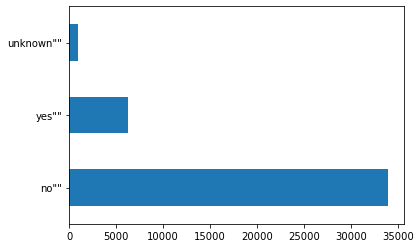

In [324]:
#verificamos a quantidade de clientes possui emprestimo pessoal no banco.
bank_data['personal_loan'].value_counts().plot(kind='barh')

Na base, observamos que 6248 clientes possui credito pessoal no banco 

In [325]:
#tem empréstimo pessoal
bank_data['personal_loan'].value_counts()

no""         33950
yes""         6248
unknown""      990
Name: personal_loan, dtype: int64

Observamos que a coluna emprestimo pessoal tem 3 valores,somente 6248 clientes possui emprestimo
pessoal.

In [326]:
#sera que a variavel professao explicar a variavel alvo
bank_data['job'].value_counts()

admin.""           10422
blue-collar""       9254
technician""        6743
services""          3969
management""        2924
retired""           1720
entrepreneur""      1456
self-employed""     1421
housemaid""         1060
unemployed""        1014
student""            875
unknown""            330
Name: job, dtype: int64

In [431]:
#verificamos os valore da coluna educacao
bank_data["education"].value_counts()

university.degree""      12168
high.school""             9515
basic.9y""                6045
professional.course""     5243
basic.4y""                4176
basic.6y""                2292
unknown""                 1731
illiterate""                18
Name: education, dtype: int64

A coluna educacao tem 8 valores,nesse caso vamos fazer a categorizacao desta coluna.

In [432]:
#verificamos a quantidade dos cliente realizadou um depósito a prazo no banco apos ultimas campanha
bank_data['term_deposit'].value_counts(normalize=True)

no""\r"     0.887346
yes""\r"    0.112654
Name: term_deposit, dtype: float64

Observamos que na ultima campanha 11.26% dos clientes realizadou um depósito a prazo no banco apos ultimas campanha.

In [433]:
#verificamos os perfile dos clientes que tem credito no banco para financiamento habitacional.
pd.crosstab(bank_data.housing, bank_data.job, normalize='columns')

job,"admin.""""","blue-collar""""","entrepreneur""""","housemaid""""","management""""","retired""""","self-employed""""","services""""","student""""","technician""""","unemployed""""","unknown"""""
housing,,,,,,,,,,,,
"no""""",0.444828,0.465096,0.440247,0.463208,0.466142,0.455814,0.451091,0.458050,0.435429,0.44194,0.424063,0.463636
"unknown""""",0.021781,0.025935,0.024725,0.027358,0.024282,0.025581,0.028149,0.025447,0.026286,0.02180,0.026627,0.015152
"yes""""",0.533391,0.508969,0.535027,0.509434,0.509576,0.518605,0.520760,0.516503,0.538286,0.53626,0.549310,0.521212


Todos os clientes tem financiamento habitacional no bano,observamos que 53.83% dos clientes alunos tem credito para financiamento habitacional,51.86% dos clientes aposentado tem credito para financiamento habitacional.

In [434]:
#Verificamos os perfiles dos clientes que tem empréstimo pessoal no banco
pd.crosstab(bank_data.personal_loan, bank_data.job, normalize='columns')

job,"admin.""""","blue-collar""""","entrepreneur""""","housemaid""""","management""""","retired""""","self-employed""""","services""""","student""""","technician""""","unemployed""""","unknown"""""
personal_loan,,,,,,,,,,,,
"no""""",0.814143,0.826453,0.833791,0.827358,0.825581,0.834884,0.834624,0.823129,0.811429,0.831529,0.826430,0.812121
"unknown""""",0.021781,0.025935,0.024725,0.027358,0.024282,0.025581,0.028149,0.025447,0.026286,0.021800,0.026627,0.015152
"yes""""",0.164076,0.147612,0.141484,0.145283,0.150137,0.139535,0.137227,0.151424,0.162286,0.146671,0.146943,0.172727


Todos os clientes tem emprestimo pessoal,observamos que 13.95% dos clientes aposentado possui emprestimo pessoal no banco,16.22% dos clientes alunos tem emprestimo pessoal no banco,e 14.69% dos clientes desempregado que possui emprestimo pessoal no banco.

In [284]:
#verificamos os perfiles dos clientes que tem inadimplência no banco
pd.crosstab(bank_data.default, bank_data.job, normalize='columns')

job,"admin.""""","blue-collar""""","entrepreneur""""","housemaid""""","management""""","retired""""","self-employed""""","services""""","student""""","technician""""","unemployed""""","unknown"""""
default,,,,,,,,,,,,
"no""""",0.875936,0.657878,0.793269,0.699057,0.843365,0.771512,0.801548,0.769211,0.881143,0.854961,0.765286,0.539394
"unknown""""",0.124064,0.342122,0.206731,0.300943,0.156635,0.228488,0.198452,0.230789,0.118857,0.144743,0.233728,0.460606
"yes""""",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000297,0.000986,0.000000


Observamos que nenhum dos clientes não tem inadimplência.

In [329]:
#Sera que a variavel profissão (job) explicar a variavel alvo.
pd.crosstab(bank_data.term_deposit, bank_data.job, normalize='columns')

job,"admin.""""","blue-collar""""","entrepreneur""""","housemaid""""","management""""","retired""""","self-employed""""","services""""","student""""","technician""""","unemployed""""","unknown"""""
term_deposit,,,,,,,,,,,,
"no""""\r""",0.870274,0.931057,0.914835,0.9,0.887825,0.747674,0.895144,0.918619,0.685714,0.89174,0.857988,0.887879
"yes""""\r""",0.129726,0.068943,0.085165,0.1,0.112175,0.252326,0.104856,0.081381,0.314286,0.10826,0.142012,0.112121


Observamos que 31.42% dos clientes alunos fez um deposito a prazo e 25.23% dos clientes aposantados,sao duas grupo do clients que tem a maior pocentagem de deposito.

In [330]:
#sera que o estado civil impacta na decisão dos clientes.
pd.crosstab(bank_data.term_deposit, bank_data.marital, normalize='columns')

marital,"divorced""""","married""""","single""""","unknown"""""
term_deposit,,,,
"no""""\r""",0.896791,0.898427,0.859959,0.85
"yes""""\r""",0.103209,0.101573,0.140041,0.15


Observamos somente 14% dos clientes soteiros fez um deposito a prazo no banco apos ultima campanha.

In [331]:
#sera que a variavel inadimplência de crédito impacta na decisão dos clientes
pd.crosstab(bank_data.term_deposit, bank_data.default, normalize='columns')

default,"no""""","unknown""""","yes"""""
term_deposit,,,
"no""""\r""",0.87121,0.94847,1.0
"yes""""\r""",0.12879,0.05153,0.0


Observamos que a variável default não afeta a variável alvo(term_deposit).

In [333]:
#Sera que a variável emprestimo pessoal impacta na decisão de abertura do depósito a prazo?
pd.crosstab(bank_data.term_deposit, bank_data.personal_loan, normalize='columns')

personal_loan,"no""""","unknown""""","yes"""""
term_deposit,,,
"no""""\r""",0.886598,0.891919,0.890685
"yes""""\r""",0.113402,0.108081,0.109315


Observamos que a variável default não afeta muito a variável alvo(term_deposit).

In [384]:
#Sera que a variavel habitacao impacta 
pd.crosstab(bank_data.term_deposit, bank_data.housing, normalize='columns')

housing,"no""""","unknown""""","yes"""""
term_deposit,,,
"no""""\r""",0.891204,0.891919,0.883806
"yes""""\r""",0.108796,0.108081,0.116194


In [385]:
#Sera que a variavel contato explicar a variavel alvo(term_deposit)
pd.crosstab(bank_data.term_deposit, bank_data.contact, normalize='columns')

contact,"cellular""""","telephone"""""
term_deposit,,
"no""""\r""",0.852624,0.947687
"yes""""\r""",0.147376,0.052313


In [291]:
#clientes que tem crédito habitação
bank_data['housing'].value_counts()

yes""        21576
no""         18622
unknown""      990
Name: housing, dtype: int64

<AxesSubplot:>

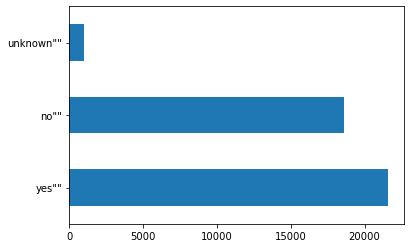

In [292]:
#verificamos a quantidade dos clientes que tem crédito habitação
bank_data['housing'].value_counts().plot(kind="barh")

<h6>Calculando a correlação de Pearson</h6>
A direção da relação é indicada pelo sinal do coeficiente; um sinal + indica uma relação positiva e um sinal - indica uma relação negativa.

In [386]:
#correlação da variável. 
correlation=bank_data.corr()
correlation

,duration,campaign,pdays,previous,employment_variation_rate,consumer_price,consumer_confidence,euribor3_month_rate,nr.employed
duration,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
employment_variation_rate,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
consumer_price,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
consumer_confidence,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3_month_rate,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Observamos que algumas variaveis tem uma relação positiva.

In [230]:
#vamos ver como fica a correlação da variável de depósito a prazo com os variáveis independentes.
print(bank_data.corr()['term_deposit'].sort_values())

nr.employed                 -0.354678
pdays                       -0.324914
euribor3_month_rate         -0.307771
employment_variation_rate   -0.298334
poutcome_nonexistent""      -0.193507
                               ...   
contact                      0.144773
previous                     0.230181
poutcome_success""           0.316269
duration                     0.405274
term_deposit                 1.000000
Name: term_deposit, Length: 23, dtype: float64


Tem algumas variáveis que tem uma relação positiva com a variável dependente(term_deposit)

In [435]:
#estatísticas descritivas
bank_data.describe()

,duration,campaign,pdays,previous,employment_variation_rate,consumer_price,consumer_confidence,euribor3_month_rate,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h6>Análise Exploratória de Dados Observações Finais:</h6>
Vamos tentar resumir algumas das principais descobertas desta EDA:
<ul>
<li>O conjunto de dados não possui valores incorretos.</li>
</ul>

<h6>visualização de dados</h6> é a prática de traduzir informações em um contexto visual, como um mapa ou gráfico, para tornar os dados mais fáceis para o cérebro humano entender e extrair insights. O principal objetivo da visualização de dados é facilitar a identificação de padrões, tendências e outliers em grandes conjuntos de dados

<h6>Calculando a correlação de Pearson com o seaborn heatmap</h6>

AxesSubplot(0.125,0.125;0.62x0.755)


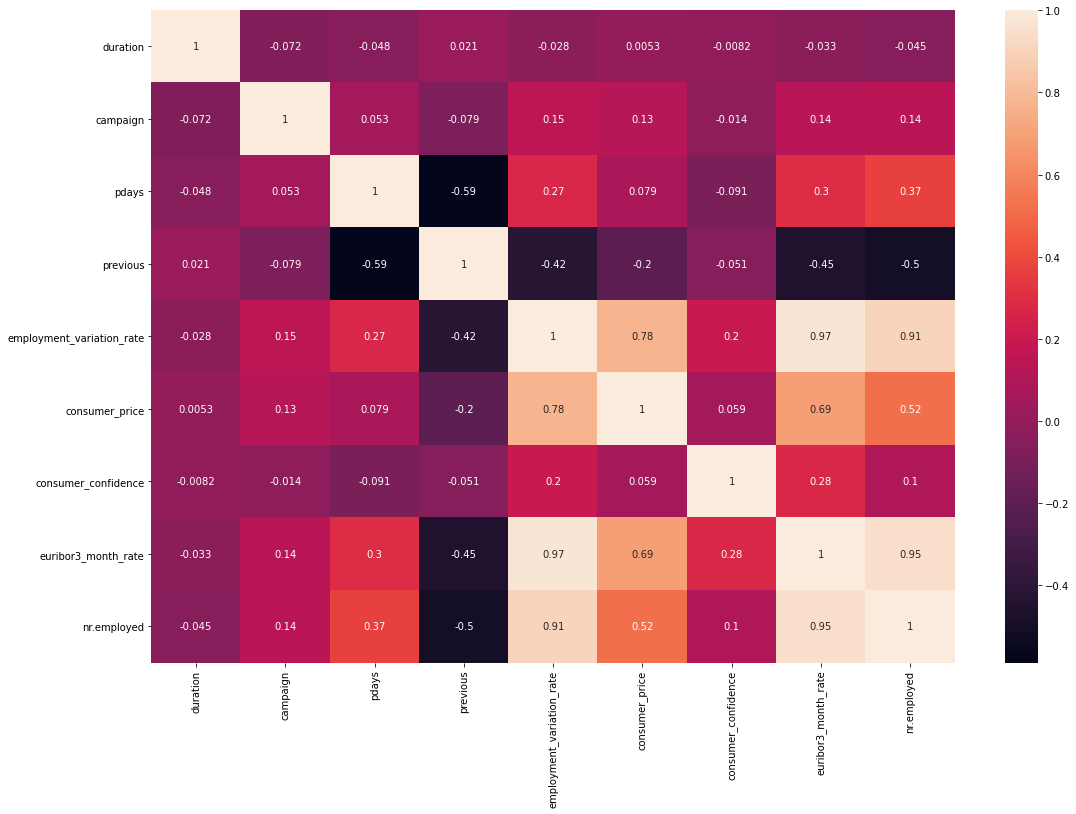

In [459]:
#matriz de correlação
f, ax= plt.subplots(figsize=(18,12))
print(sns.heatmap(correlation, annot=True))

AxesSubplot(0.125,0.125;0.775x0.755)


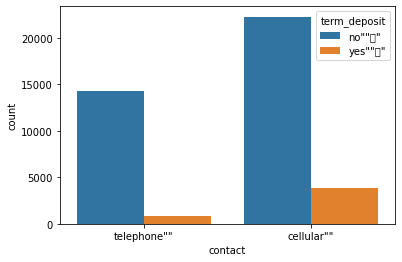

In [336]:
#variável contato vs variável alvo
print(sns.countplot(x='contact', hue='term_deposit', data=bank_data))

AxesSubplot(0.125,0.125;0.775x0.755)


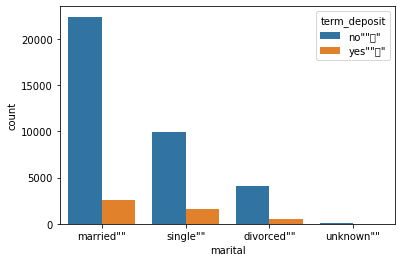

In [337]:
#variável estado civil vs variável alvo
print(sns.countplot(x='marital', hue='term_deposit', data=bank_data))

<h6>Verificamos a distribuição das variaveis</h6>
Uma boa maneira de visualizar a distribuição de uma variável numérica é um histograma. Mas em que consistem? Os histogramas são uma forma de exibir a distribuição de um conjunto de dados, traçando o número ou porcentagem de observações cujos valores estão dentro de intervalos numéricos predefinidos e, em seguida, plotando esses números ou porcentagens em um gráfico de barras. Ou seja, em um histograma, os dados são colocados em intervalos e a altura das barras representa o número de casos que caem em cada intervalo. Em outras palavras, um histograma fornece uma visão da densidade de dados.


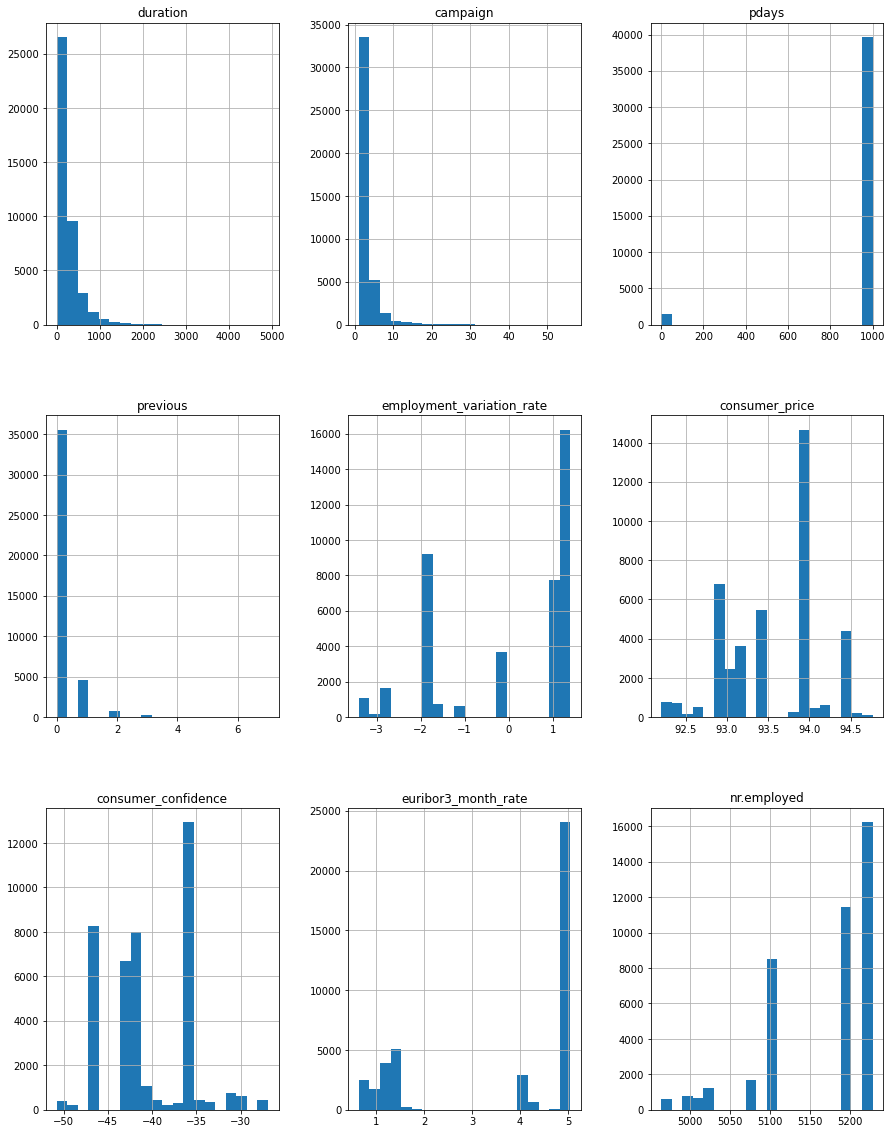

In [436]:
#Plot histogram
bank_data.hist(bins=20, figsize=(15,20))
plt.show()

<h6>pré-processamento de dados</h6> é o processo de transformar dados brutos em um formato compreensível. Também é um passo importante na mineração de dados, pois não podemos trabalhar com dados brutos. A qualidade dos dados deve ser verificada antes de aplicar algoritmos de aprendizado de máquina ou mineração de dados.


<h6>Categorização de variáveis</h6>
A categorização de variáveis contínuas é definida por Kerber (1992) como o processo de dividir os valores de uma variável em um pequeno número de intervalos, onde cada intervalo é formado por um símbolo discreto.

In [437]:
#categorização de variável educação
bank_data["education"].value_counts()

university.degree""      12168
high.school""             9515
basic.9y""                6045
professional.course""     5243
basic.4y""                4176
basic.6y""                2292
unknown""                 1731
illiterate""                18
Name: education, dtype: int64

In [438]:
#categorização de variável educação
education_map = {'high.school""' : 'school', 'basic.9y""' : 'school', 'basic.4y""' :'school',\
                  'basic.6y""': 'school','unknown""':'school'}

bank_data['educaCat'] = bank_data['education'].replace(education_map)
bank_data['educaCat'].value_counts()

school                   23759
university.degree""      12168
professional.course""     5243
illiterate""                18
Name: educaCat, dtype: int64

In [439]:
#categorização de variável job
bank_data["job"].value_counts()

admin.""           10422
blue-collar""       9254
technician""        6743
services""          3969
management""        2924
retired""           1720
entrepreneur""      1456
self-employed""     1421
housemaid""         1060
unemployed""        1014
student""            875
unknown""            330
Name: job, dtype: int64

In [440]:
#categorização de variável job
job_map = { 'unknown""' : 'group', 'unemployed""' : 'group', 'housemaid""' :'group', 'blue-collar""' :
           'group','retired""':'group'}

bank_data['clients'] = bank_data['job'].replace(job_map)
bank_data['clients'].value_counts()

group              13378
admin.""           10422
technician""        6743
services""          3969
management""        2924
entrepreneur""      1456
self-employed""     1421
student""            875
Name: clients, dtype: int64

In [441]:
#categorização de variável job
job_map1 = { 'student""' : 'group2', 'self-employed""' : 'group2', 'services""' :'group2'}

bank_data['clients'] = bank_data['clients'].replace(job_map1)
bank_data['clients'].value_counts()

group             13378
admin.""          10422
technician""       6743
group2             6265
management""       2924
entrepreneur""     1456
Name: clients, dtype: int64

In [442]:
#Dummificacao das variaveis categorias binarias
catego_binario=["default","housing","personal_loan","poutcome"]
for column in catego_binario:
    dummy= pd.get_dummies(bank_data[column], prefix=column)
    bank_data=pd.concat([bank_data,dummy], axis=1)
    bank_data.drop(column, axis=1, inplace=True) 

In [443]:
#
bank_data["term_deposit"]=bank_data['term_deposit'].replace('no""\r"', 0)
bank_data["term_deposit"]=bank_data['term_deposit'].replace('yes""\r"',1)
bank_data["contact"]=bank_data['contact'].replace('telephone""',0)
bank_data["contact"]=bank_data["contact"].replace('cellular""',1)

In [444]:
#group categorical variable to transform into numerical
cat=["educaCat","clients"]

In [445]:
bank_data= pd.get_dummies(bank_data, columns=cat, drop_first=True)

In [446]:
bank_data.head(10)

,age,job,marital,education,contact,duration,campaign,pdays,previous,employment_variation_rate,consumer_price,consumer_confidence,euribor3_month_rate,nr.employed,term_deposit,"default_no""""","default_unknown""""","default_yes""""","housing_no""""","housing_unknown""""","housing_yes""""","personal_loan_no""""","personal_loan_unknown""""","personal_loan_yes""""","poutcome_failure""""","poutcome_nonexistent""""","poutcome_success""""","educaCat_professional.course""""",educaCat_school,"educaCat_university.degree""""","clients_entrepreneur""""",clients_group,clients_group2,"clients_management""""","clients_technician"""""
0,"0,""56","housemaid""""","married""""","basic.4y""""",0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,"1,""57","services""""","married""""","high.school""""",0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
2,"2,""37","services""""","married""""","high.school""""",0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,"3,""40","admin.""""","married""""","basic.6y""""",0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,"4,""56","services""""","married""""","high.school""""",0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
5,"5,""45","services""""","married""""","basic.9y""""",0,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6,"6,""59","admin.""""","married""""","professional.course""""",0,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
7,"7,""41","blue-collar""""","married""""","unknown""""",0,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
8,"8,""24","technician""""","single""""","professional.course""""",0,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1
9,"9,""25","services""""","single""""","high.school""""",0,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [447]:
#aplicar feature scaling 
standard= StandardScaler()
bank_data[["consumer_price","euribor3_month_rate","duration","nr.employed"]]= standard.fit_transform(bank_data[["consumer_price","euribor3_month_rate","duration","nr.employed"]])


<h6>Vamos criar a variável dependente e a variável independente</h6>

In [448]:
#dependente y e independente x
x= bank_data.drop(['term_deposit','age','job','pdays','education','pdays','marital'], axis= 1).values
print(x.shape)

y= bank_data['term_deposit'].values
print(y.shape)

(41188, 29)
(41188,)


In [449]:
#let's split the data into training set and testing set
X_train, X_test, Y_train, Y_test= train_test_split(x, y, stratify=y,test_size= 0.3, random_state= 2)


print("O valor de treinamento X_train:{}".format(X_train.shape))
print("O valor de teste X_test:{}".format(X_test.shape))

print("O valor de treinamento Y_train :{}".format(Y_train.shape))
print("O valor de teste Y_test:{}".format(Y_test.shape))

O valor de treinamento X_train:(28831, 29)
O valor de teste X_test:(12357, 29)
O valor de treinamento Y_train :(28831,)
O valor de teste Y_test:(12357,)


<h3>Treinamento de Modelo:</h3>

Nesta seção, vamos ajustar, treinar e testar vários modelos de aprendizado de máquina para classificá-los e, em seguida, escolher algumas métricas para avaliá-los.

<h6>Logistic Regression</h6>

In [450]:
# Instantiate the logistic regression.
logi_reg= LogisticRegression()

#setup the parameters.
parameters= {'C':[0.01,0.1,1], 'penalty':['l2','l1'], 'solver':['liblinear']}

# Instantiate  the GridsearchCV.
logi_regrecv = GridSearchCV(logi_reg, param_grid=parameters, cv=5, scoring='accuracy')

#Fitting The logistic regression on the training set.
logi_regrecv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [451]:
print(logi_regrecv.best_score_)

0.9104088345539626


In [366]:
logi_regrecv.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [452]:
#
logi_regre = logi_regrecv.score(X_test, Y_test)
print(logi_regre)

0.9110625556364813


In [453]:
#
ypred_logistic= logi_regrecv.predict(X_test)
print(ypred_logistic)

[1 0 0 ... 0 0 0]


In [407]:
print(pd.crosstab(Y_test,ypred_logistic, rownames=["actual"], colnames=["predicted"],margins=True))

predicted      0    1    All
actual                      
0          10693  272  10965
1            836  556   1392
All        11529  828  12357


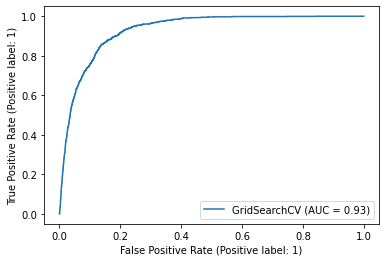

In [417]:
metrics.plot_roc_curve(logi_regrecv, X_test, Y_test) 
plt.show()

In [406]:
#get the valor of the classification metrics
logistic_perform= classification_report(Y_test,ypred_logistic)
print(logistic_perform)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10965
           1       0.67      0.40      0.50      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



AxesSubplot(0.125,0.125;0.775x0.755)


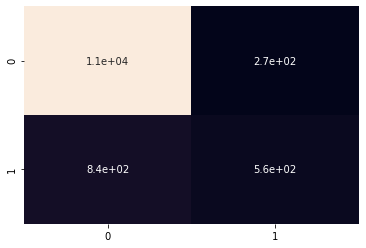

In [418]:
# plotting the confusion matrix
cm= confusion_matrix(Y_test,ypred_logistic)
print(sns.heatmap(cm, annot=True, cbar= False))

A matriz de confusão indica que temos 1104+5602 previsão correta e 8402+2702 previsão incorreta.

<h6>Cálculo da probabilidade de um cliente responder</h6>
O método predict_proba()
No contexto de tarefas de classificação, alguns estimadores sklearn também implementam o método predict_proba que retorna as probabilidades de classe para cada ponto de dados.
O método aceita um único argumento que corresponde aos dados sobre os quais as probabilidades serão calculadas e retorna uma matriz de listas contendo as probabilidades de classe para os pontos de dados de entrada


In [457]:
#predicting the probability for a customer will respond
logit_prob=logi_regrecv.predict_proba(X_test)

In [456]:
df_prob=pd.DataFrame(logit_prob)
df_prob

,0,1
0,0.478996,0.521004
1,0.988493,0.011507
2,0.986465,0.013535
3,0.996517,0.003483
4,0.980324,0.019676
...,...,...
12352,0.993493,0.006507
12353,0.987436,0.012564
12354,0.958296,0.041704
12355,0.981810,0.018190


conclusão:
De acordo com a acuracia de regressão logística e os valores da probabilidade,podemos dizer que 
as variáveis mais influentes são duração, nr.employed, euribor3m e emp.var.rate.Portanto, se os bancos quiserem melhorar os resultados, o que eles devem fazer é contratar
mais pessoas para trabalhar para eles,aumentar a eficiência da campanha de marketing bancário,melhorar a qualidade da conversa ao telefone e executar
suas campanhas quando as taxas de juros estão altas e o ambiente macroeconômico é estável.